First, let's run some CartPole PPO

In [6]:
!python mighty/run_mighty.py experiment_name=cartpole_ppo_latest algorithm=ppo environment=gymnasium/cartpole seed=0,1,2,3,4 -m

/Users/theeimer/anaconda3/envs/mighty/lib/python3.10/site-packages/pygame/pkgdata.py:25: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import resource_stream, resource_exists
/Users/theeimer/anaconda3/envs/mighty/lib/python3.10/site-packages/pkg_resources/__init__.py:2825: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('sphinxcontrib')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/Users/theeimer/anaconda3/envs/mighty/lib/python3.10/site-packages/dacbench/envs/__init__.py:34: UserWarning: CMA-ES Benchmark not installed. If you want to use this benchmark, please follow the installation guide.
  warnings.warn(  # noqa: B028
/Users/theeimer/anaconda3/envs/mighty/lib/python3.10/site-p

Then let's load the data:

In [1]:
import json
import pandas as pd
from mighty.mighty_utils.logger import to_dataframe

def load_results(experiment_name, seeds=[0,1,2,3,4]):
    dfs = []
    for s in seeds:
        logs = []
        with open(f"runs/{experiment_name}_{s}/eval.jsonl", "r") as f:
            for line in f:
                logs.append(json.loads(line))
        df = to_dataframe(logs)
        df["seed"] = s
        dfs.append(df)
    return pd.concat(dfs)

In [2]:
ppo_cartpole = load_results("cartpole_ppo")
ppo_cartpole["algorithm"] = "baseline"

#ppo_cartpole_latest = load_results("cartpole_ppo_latest")
#ppo_cartpole_latest["algorithm"] = "update"
#ppo_cartpole = pd.concat([ppo_cartpole, ppo_cartpole_latest])

/Users/theeimer/Documents/git/Mighty-DACS/mighty/mighty_utils/logger.py:193: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dataframe[column][(dataframe["total_steps"] < i) & (dataframe["total_steps"] > last_step)] = last_value
/Users/theeime

And check how performance looks:

/Users/theeimer/Documents/git/Mighty-DACS/mighty/mighty_utils/plotting.py:200: UserWarning: The palette list has more values (10) than needed (1), which may not be intended.
  ax = sns.lineplot(data=data, x=x, y=y, ax=ax, marker=marker, hue=hue, errorbar=errorbar, estimator=aggregation,palette=sns.color_palette('colorblind', as_cmap = True))


array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

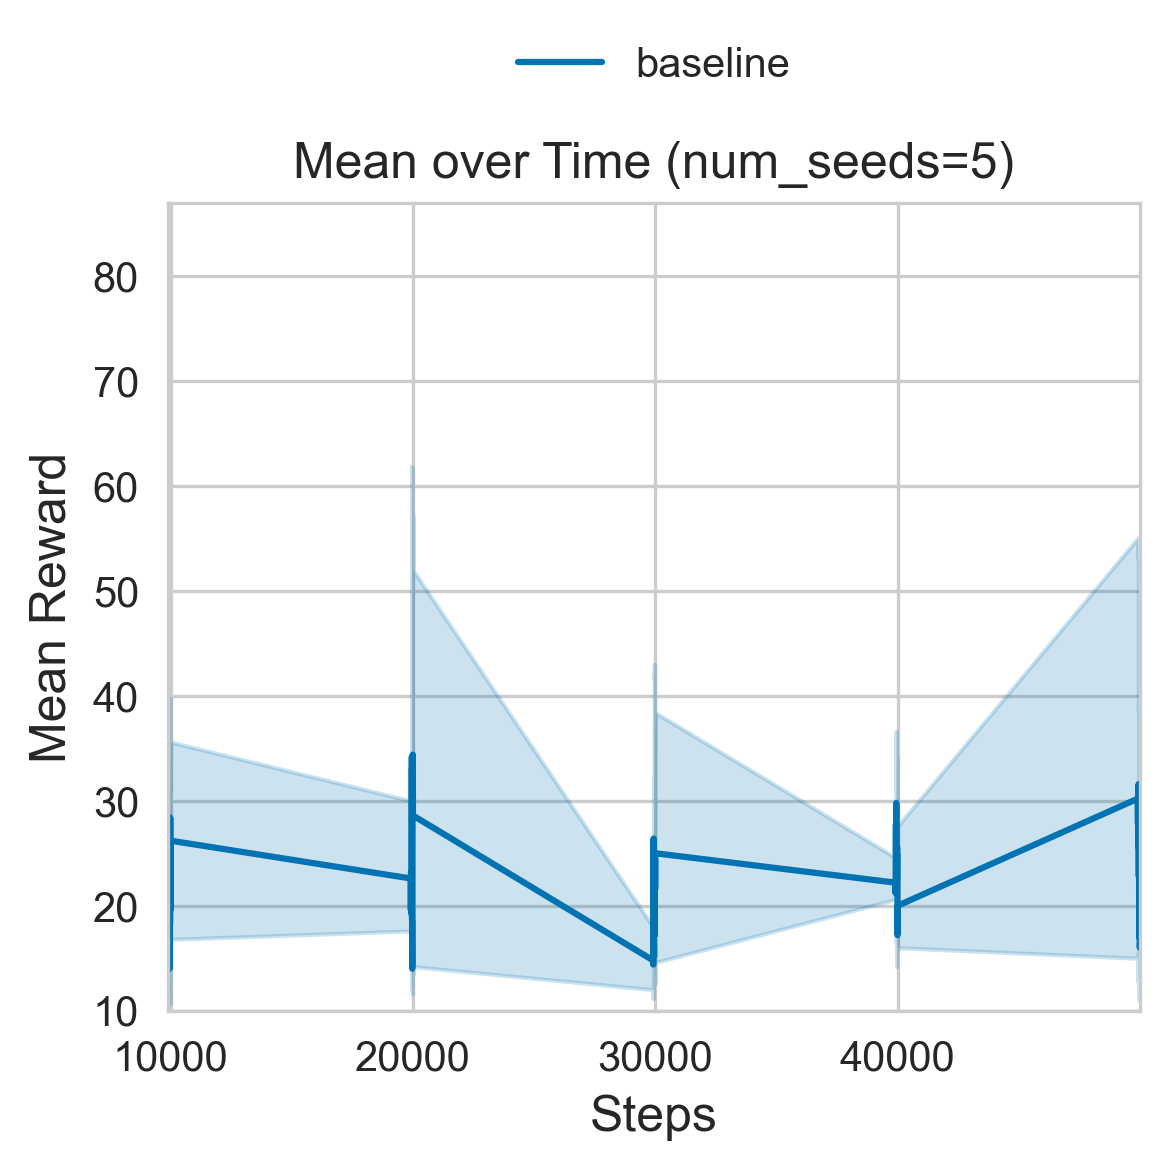

In [10]:
import numpy as np
from mighty.mighty_utils.plotting import plot_performance_over_time

# Make episode reward a scalar instead of list
ppo_cartpole['episode_reward'] = [np.array(x).mean() for x in ppo_cartpole.episode_reward.values]
# Just take eval points for plotting
plot_data = ppo_cartpole[ppo_cartpole.episode_reward.isna() == False]

plot_performance_over_time(plot_data, x="total_steps", y="episode_reward", hue="algorithm", aggregation="mean", logx=False, xlabel="Steps", ylabel="Mean Reward")

Score history:

PPO: max 30 - ...